# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 2nd, 2020 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 9th, 2020 at 23:55.

## Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [307]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year). In this exercise, please generate the visualizations described below. 

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


## Solution to part 1
First we will start by importing the packages that will be useful for this part of the assignment.

In [308]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
%matplotlib inline

In [309]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

Then we create a column of the dataframe as a datetime object, so it's easier to work with dates in the following exercises.

In [310]:
df['Date_dt']=pd.to_datetime(df.Date, format='%m/%d/%Y', errors='coerce')

We do not take into account the year 2018 since the data is not complete for that year, which can lead to some distortion of the visualization given that we have more points at a certain period of the year.

In [311]:
df['Year'] = df['Date_dt'].map(lambda x: x.year)
df=df[df.Year<2018]
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Date_dt,Year
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000,2014-09-23,2014
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134,2015-01-15,2015
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085,2014-07-30,2014
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134,2015-05-02,2015
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020,2004-07-02,2004


#### Weekly patterns
first we analyze the weekly patterns on the data by making bar plots of the quantity of a given forcus crime over each day of the week. Notice that we define a fuinction to avoid rewritting the same piece of code over and over.

<Figure size 2160x3600 with 0 Axes>

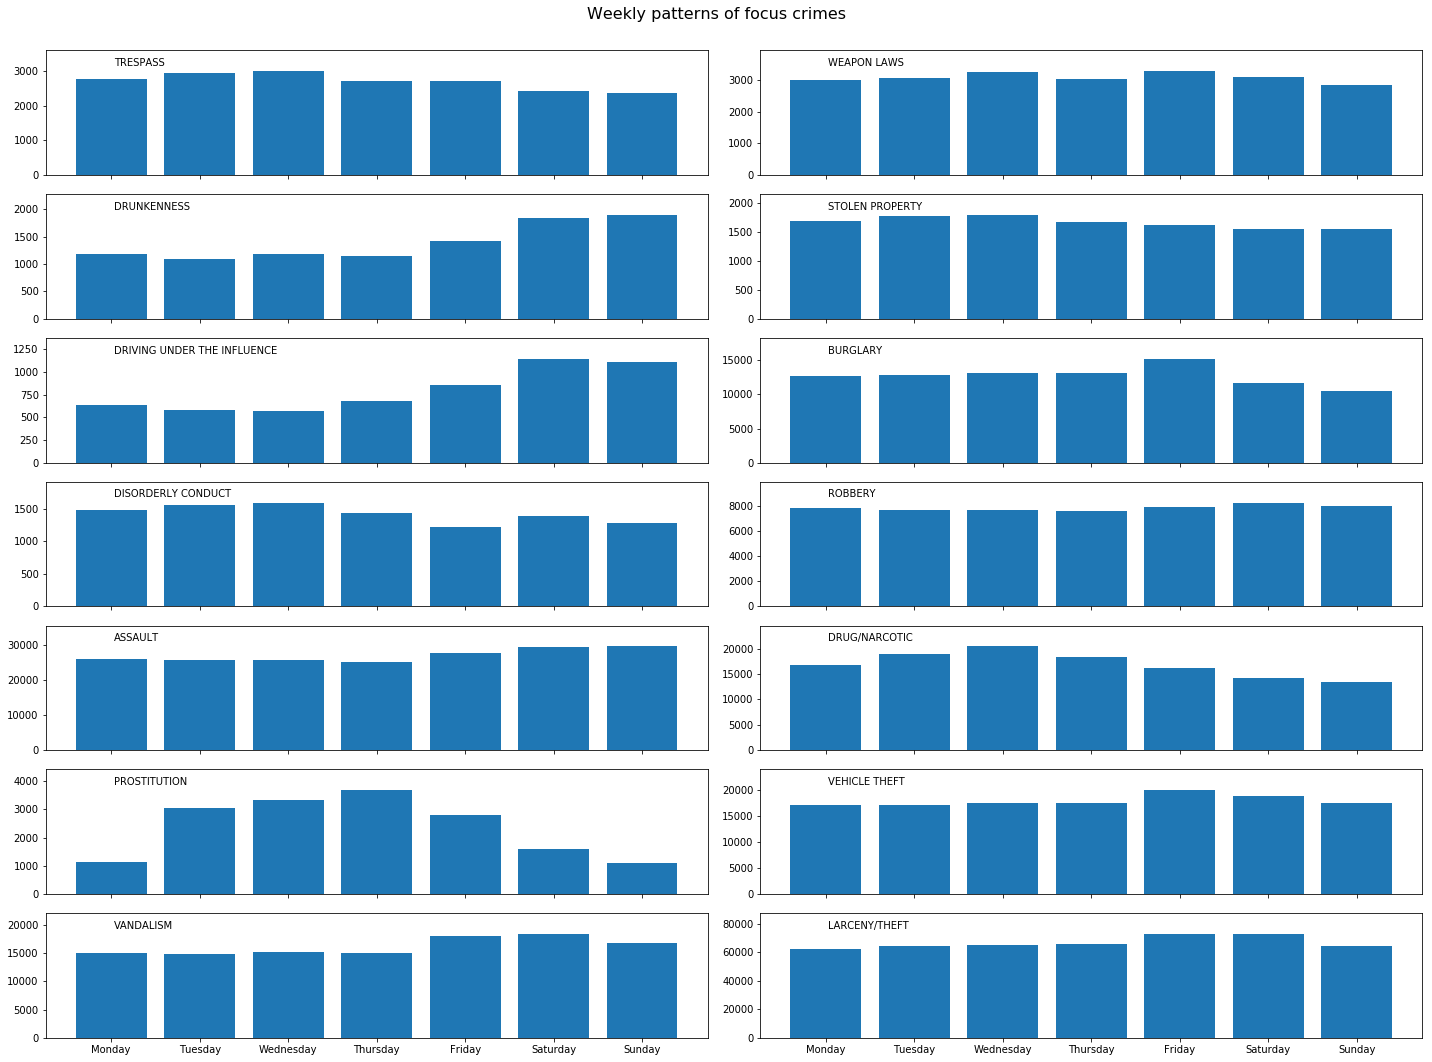

In [312]:

df_weekly=df[df.Category.isin(focuscrimes)].groupby(['DayOfWeek','Category'])['IncidntNum'].count()
df_weekly=df_weekly.reindex(list(calendar.day_name ), level='DayOfWeek')
#function to plot the focus crimes over different period of times.

def barplots(df,focuscrimes, title):
    a=0
    plt.figure(figsize=(30, 50))
    fig, ax = plt.subplots(nrows=7, ncols=2, sharex=True,figsize=(20,15))
    for i in focuscrimes:
        b=a%7
        c=a%2
        ax[b,c].bar(df[:,i].index ,df[:,i])
        ax[b,c].text(0.03,df[:,i].max()*1.05,i)
        ax[b,c].set_ylim(0,df[:,i].max()*1.2)
        a+=1
    plt.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.94)
    plt.show()

barplots(df_weekly, focuscrimes, 'Weekly patterns of focus crimes')

`Looking at the weekly patterns, there are some things that tend to happen more in weekends, fx crimes that envovle alcohol. The protitution is a bit funny, it seems as the demand for prostitution is high mid-week.`

#### Monthly Patterns

<Figure size 2160x3600 with 0 Axes>

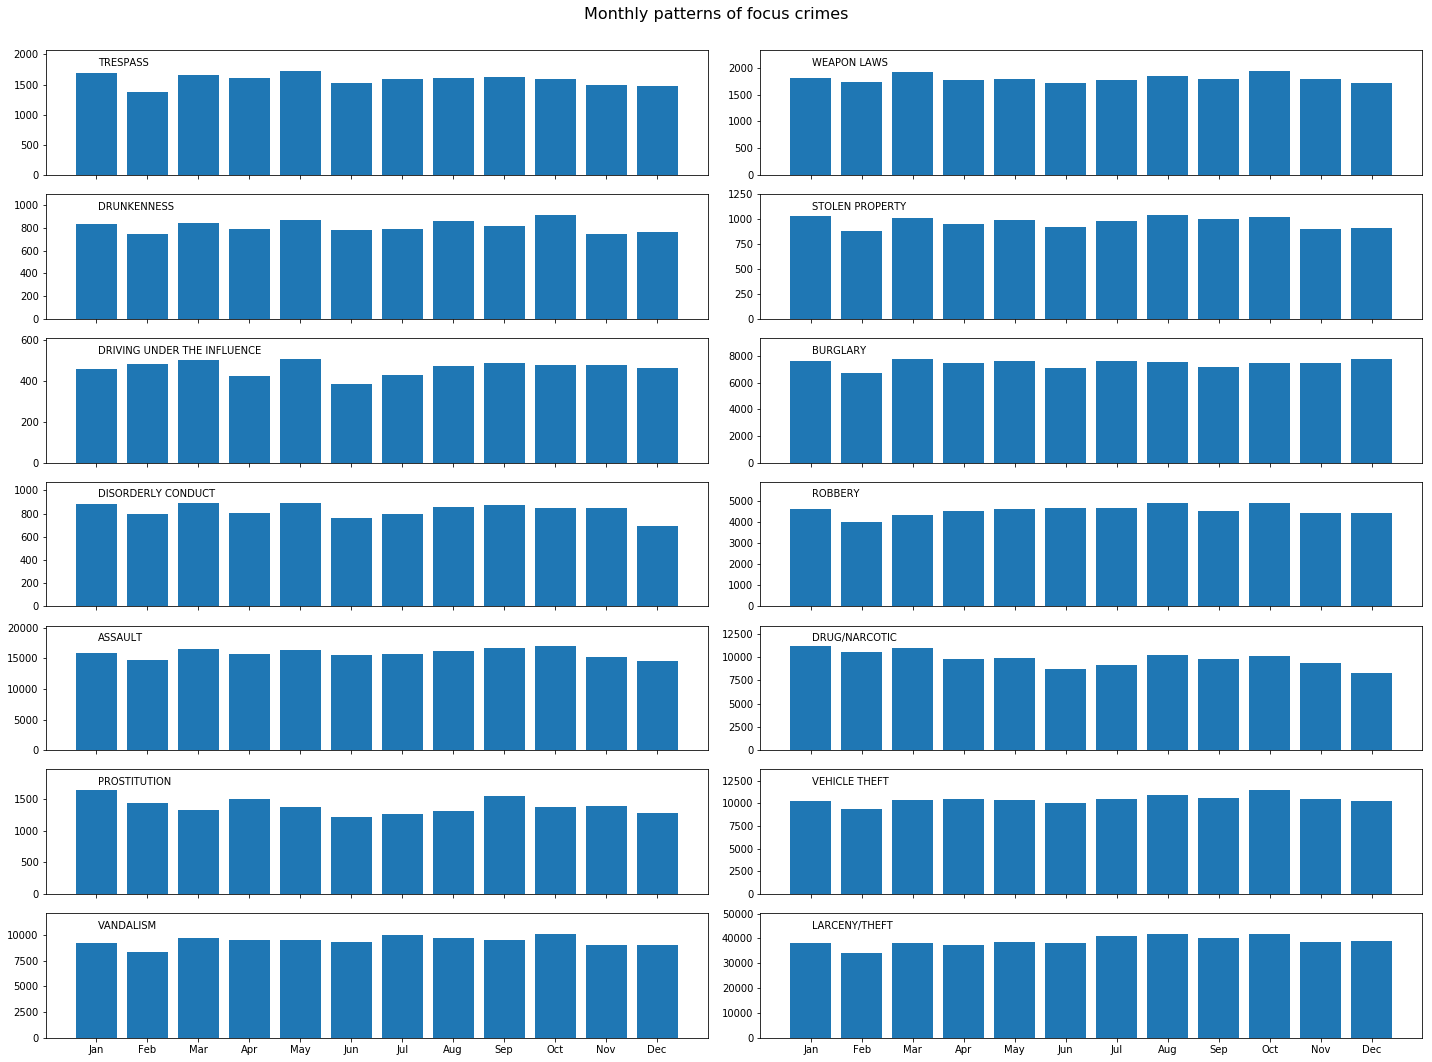

In [313]:
df['Month'] = df['Date_dt'].map(lambda x: calendar.month_abbr[x.month])
df['Month_nr'] = df['Date_dt'].map(lambda x: float(x.month))
df_monthly=df[df.Category.isin(focuscrimes)].groupby(['Month','Category'])['IncidntNum'].count()
df_monthly=df_monthly.reindex(list(calendar.month_abbr ), level='Month')

barplots(df_monthly, focuscrimes, 'Monthly patterns of focus crimes')


`It seems that most of the crimes are pretty general during the years, except again prostitution, it seems that just before before summer holdiday, after summer holiday and right after christmas, are the peak periods. This could seem that prostitution activity is in high demand just before people go on holdiday and spend time with the families, and then rejoin the prostitution activities when they come back, and then right after christmas. It could be interresting to find out what might lead to this behavior.`

#### Hourly Patterns

<Figure size 2160x3600 with 0 Axes>

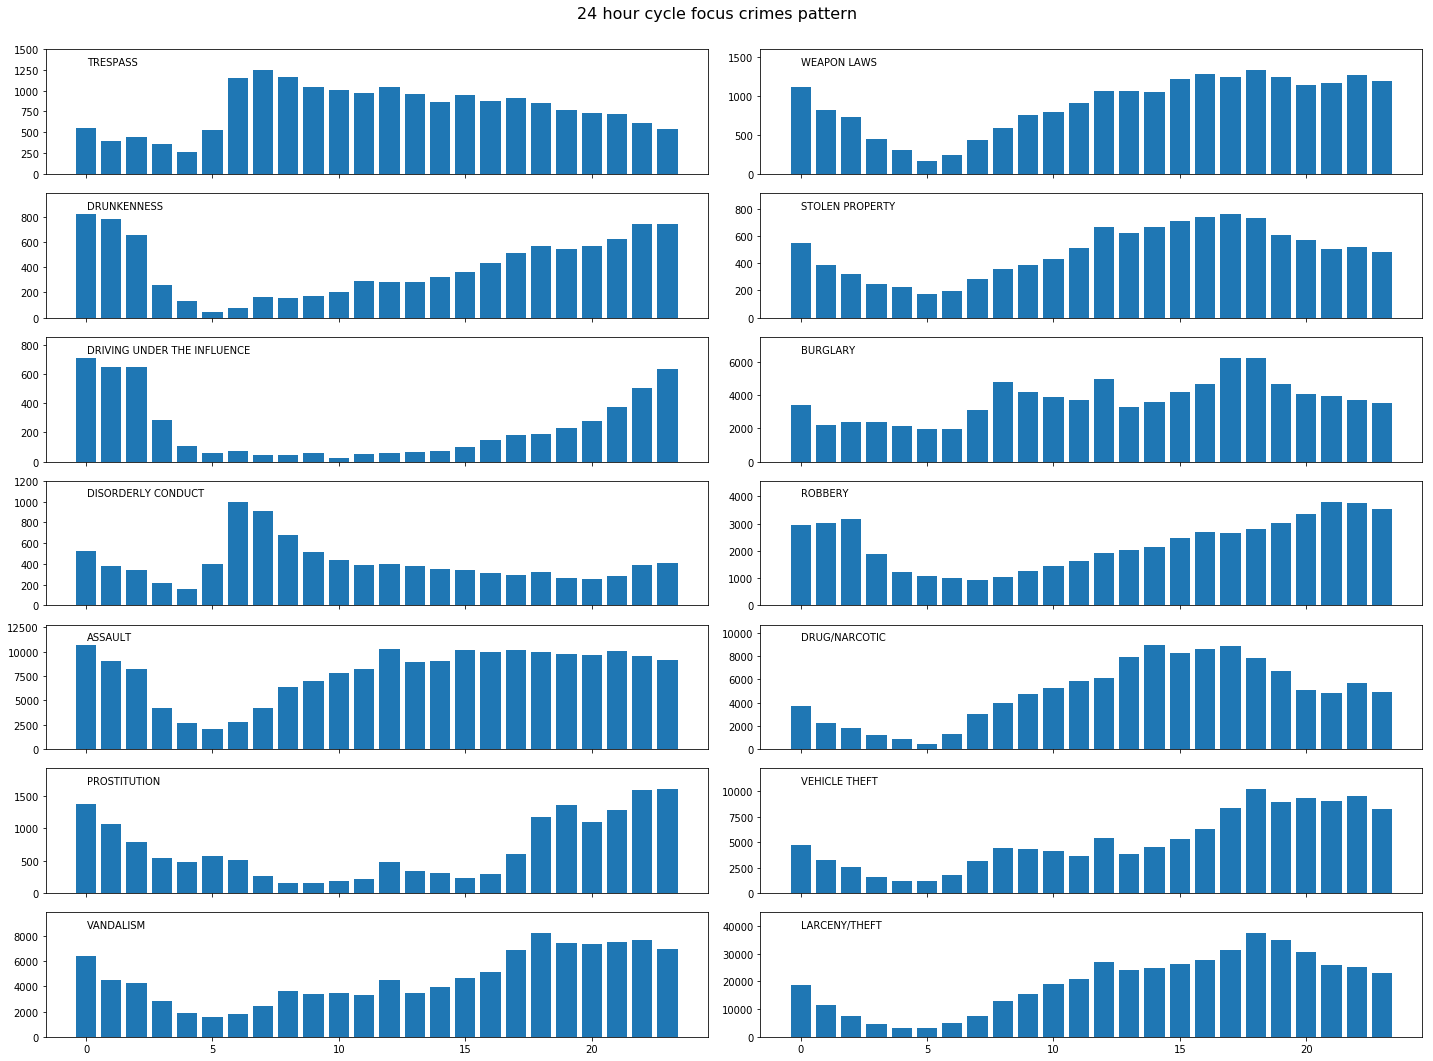

In [314]:
df['Time'] = [x + ':00' for x in df['Time']]
df['TimeInt']=pd.to_timedelta(df.Time, unit='hours').dt.floor('H')
df['HourInt']=  df['TimeInt']/ np.timedelta64(1, 'h')
df_24h=df[df.Category.isin(focuscrimes)].groupby(['HourInt','Category'])['Category'].count()

barplots(df_24h, focuscrimes, '24 hour cycle focus crimes pattern')

`Common for most crimes is that early in the morning most crimes are down. This could be because most people are asleep at this point. There is a little more activity in the prostitution during the early hours, but not much.` 

#### 186 Hourly Pattern

<Figure size 2160x3600 with 0 Axes>

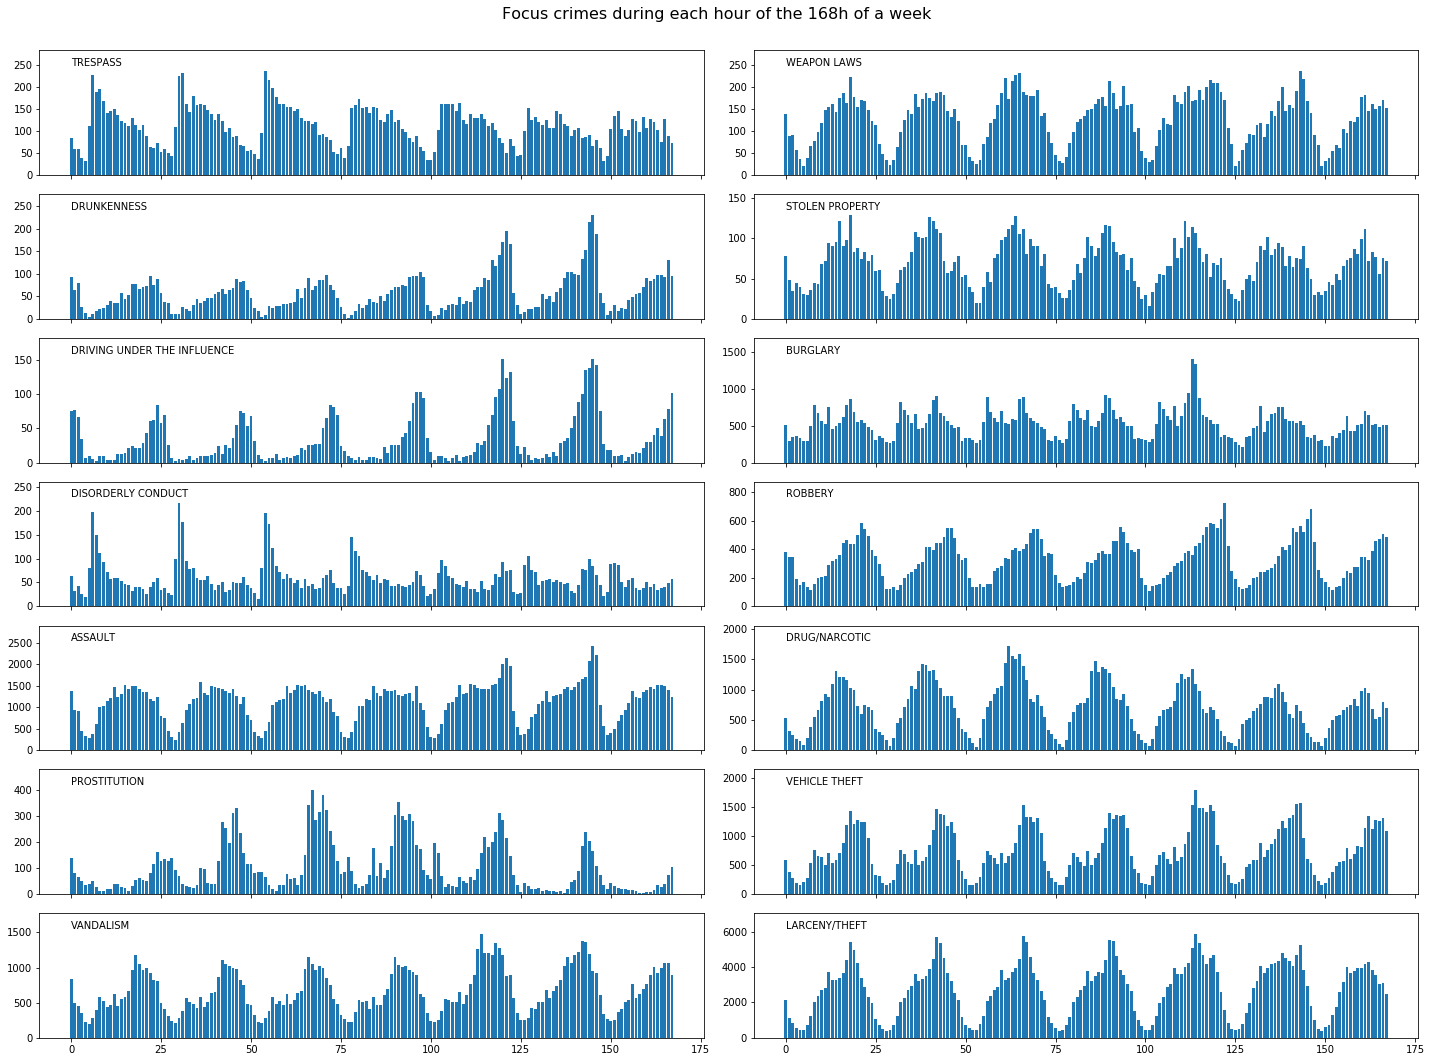

In [315]:
days = dict(zip(calendar.day_name, range(7))); 
df['Day_nr'] = df['DayOfWeek'].map(lambda x: days[x])
# hour 0 corresponds to monday 00:00 - 01:00
df['Interval168']=df['Day_nr']*24+df['HourInt']
df_timeint168=df[df.Category.isin(focuscrimes)].groupby(['Interval168','Category'])['Category'].count()
barplots(df_timeint168,focuscrimes,'Focus crimes during each hour of the 168h of a week')

`It is clear to see that a pattern goes through every single crime through the hours of the weeks. `

## Part 2: Thinking about data and visualization

*Excercise:* Questions for the [first video lecture](https://www.youtube.com/watch?v=9D2aI30AMhM).
* What is the difference between *data* and *metadata*? How does that relate to the bike-example?
* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
* In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 


### Solution Part 2 - First video 
----------------
* **What is the difference between data and metadata?** <br> 

**Data**:<br>
Data is the thing metadata refers to. Data is more descriptive than metadata. Data can be a wide range of different descriptive data objects such as words, numbers, fact, observations and anything else that describes somehting. Data may either come proccesed or unproccesed, and can be informative or not. Statistiscs can be operated on the data if the data allows it.<br> <br>
**Metadata**:<br>

Metadata describes relevant information about the data. It is always proccsed and is always informative. 

-------

* **Is the human eye a great tool  for data analysis?**<br>



**Good**: <br>
The human eye is great for interpreting visuals and and figures. It is good at seeing differences and patterns in a "simple" context.<br>
* $Example$: <br> The plots above is a good indication of how good the human eye is at interpreting simple patterns in a visual context. We can very fast see that there is a pattern in the different plot. If we take the robbery plot, we can quickly see that most robberies are done from between 0700 - 2400.


**Bad**: <br>
The human eye is bad at interpretting finding patterns in "noisy" data collections, it it is significanlt harder for the eye to filter alle the different inputs that the eyes gets. 
* **Example**: <br>
The following link give a good idea of what the eye or our brain is bad at when it come to finding a "pattern" in a space with lots of information. It is hard for is to categorize the information and see the pattern in the picture. Here is a example, og finding a pattern. [Owls at sunset](https://puzzling.stackexchange.com/questions/16996/owls-at-sunset-find-the-odd-one-out/17001), give it a go. To the answer is a great axplantion, which also illustrates how fast we are able to see the "wrong" pattern, when visualized in a different way. This just shows, how we are not able to filter large data because we are not able to filter it good enough, and we can get confussed by the loads of information the eye is getting, and everything looks a bit the same. 



-----
* **Example of Simpson's paradox** <br>

<img src="https://external-preview.redd.it/Sjv73pdgT4zbB7HwxB05Jkod66sTjM1qBy2_otAhIbU.png?auto=webp&s=ccd8bb7edd53f685b7ddaebb24ac8e8501bb8b25" alt="simpsons" width="650"/>

The image is from: https://www.reddit.com/r/dataisbeautiful/comments/28794r/an_illustration_of_simpsons_paradox_oc/

The image above illustrates the simpsons paradox. I it seen that if a data set is observed as one, it is seen that the trend is negative. This might give a false indications of the analysis, considering what is desired. When the dataset is split into two group. fx, male and female, there is acutally a positive trend. 

---
* **Difference of explanatory and eploratory data analysis** <br>

$Exploratory$: <br>
Exploratory data is when the data is analyzed, trying to get somehting out of the data. It can be to prove an hypthesis or find out a pattern in peoples MAC DONALD orders. It is in this part that one digs into the data, and tries to find a pattern. 

$Explanatory$: <br>
The explanatory part is when the data is presented. It can be the conclusion of the exploratory part, and is revealed for the people who migt be interrested in the findings. It is here that only the important information devrived from the exploratory part is presented. 

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

### Solution Part 2 - Second video 
----------------

* **How does the correlation work** <br>

The Pearson correlation is a way of determining how to variables correlate. The Pearson correlation gives a value between -1 and 1. If the the Pearsob calculation is -1, is means that the two variales will move in oppsite directions. So if A moves 1 unit up, B will move 1 unit the opposite way. If the Pearson correlation is 1, it means that when A moves 1 unit up, B moves 1 unit up aswell. If the Pearson correlation is 0, it means that A and B do not follow any mutaul pattern, they are independant of each other. <br>

The Pearson correlation is given by: 
$$r=\frac{n\left(\sum x y\right)-\left(\sum x\right)\left(\sum y\right)}{\sqrt{\left[n \sum x^{2}-\left(\sum x\right)^{2}\right]\left[n \sum y^{2}-\left(\sum y\right)^{2}\right]}}$$

**Where it might fail** <br>
Correlation might fail to describe the to variables. Two variables might be very correlated, and that can result in that the two variables can seem the same. This can be "wrong", because the correlation does not say anything about how they are distributed, what their mean etc is. This is more easily seen with a boxplot, scatter plot or a histogram. 

---
* **Difference between a histogram and a bar-chart** <br>

A histogram can be used to plot distribution of a data set. A histrogram takes one input, and is hen defined to how many "bins" are "groups" it should make o the data. This will tell something about the distribution of the data, where the majority of the data is located, get an idea of where the mean is. Where a bar-chart takes two inputs. A bar chart shows the count of a specific data variables different categories. This can indicate how the data is distributed within a varaible. 


---
* **Choosing right bins-size** <br>

To find the right amount of bins there is the **Freedman-Diaconis rule**. The rule is made to minimize the difference between the area under the empirical probaility distribution and the area under the theoretical distribution.

The **Freedman-Diaonis rule** is given by: $$Bin width =2 \frac{\operatorname{IQR}(x)}{\sqrt[3]{n}}$$

The Interquantile range (IQR) is the difference between the 75th and 25th percentiles. 
$$ IQR = Q_3 - Q_1 $$












## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
* Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).
* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading? 

## Part 4: Heatmaps of geo-data
*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude. <br>
`Plot of San Fransisco with a zoom of 13 and lat = 37.7749 & lon = -122.4195`


In [316]:
map_sf= folium.Map([37.7749, -122.4194],tiles='Stamen Toner', zoom_start=13)
map_sf

* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

In [317]:
folium.Marker([37.77919, -122.41914], popup='City Hall', icon=folium.Icon(color='blue')).add_to(map_sf)
map_sf

* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a *point scatter plot.*<br>
` Bellow we have a scatter plot with all the specified crimes`

In [318]:
df_points=df[(df["Category"]=='DRUG/NARCOTIC') & (df["Date_dt"]>pd.Timestamp('2016-06-01')) & (df["Date_dt"]< pd.Timestamp('2016-07-31')) ]
for y,x in zip(df_points.Y, df_points.X):
    folium.CircleMarker( [y, x], radius = 3, fill = True, fill_opacity=1).add_to(map_sf)
map_sf

---
### HeatMaps
* Next, let's play with **heatmaps**. You can figure out the appropriate commands by grabbing code from the main [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data)) and modifying to suit your needs.

 * To create your first heatmap, grab all arrests for the category `'SEX OFFENSES, NON FORCIBLE'` across all time. Play with parameters to get plots you like.
 <br> `Heat map the two categories "SEX OFFENSES & NON FORCIBLE" `

In [319]:
df_sex=df[df['Category']=='SEX OFFENSES, NON FORCIBLE']


map_sf2 = folium.Map([37.7749, -122.4194],tiles='Stamen Toner', zoom_start=13)

# Ensure you're handing it floats
df_sex['Y'] = df_sex['Y'].astype(float)
df_sex['X'] = df_sex['X'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs

heat_df = df_sex[['Y', 'X']]
heat_df = heat_df.dropna(axis=0, subset=['Y','X'])

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_df.iterrows()]
#heat_data= [[heat_df['Y'].tolist()], [heat_df['X'].tolist()]]
# Plot it on the map
HeatMap(heat_data, radius=12, max_zoom=13).add_to(map_sf2)

# Display the map
map_sf2


/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


* Now, comment on the differences between scatter plots and heatmaps. 
    * What can you see using the scatter-plots that you can't see using the heatmaps? 
        - Using scatter plots you can see the exact locations of the events, alsom you can count the events on a certain radius, while with heatmaps you get an estimation by looking at the legend and estimating the radius.
    * And *vice versa*: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
         - The heatmaps are useful when for example you have manh events in the exact same location, which in the scatter plostd would show as just one point. Also, it is very easy to see the density of events.

* Play around with the various parameter for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html

In [320]:
def getHeatMap(df, Map, rad=12, maxz=13):
    # Ensure you're handing it floats
    df['Y'] = df['Y'].astype(float)
    df['X'] = df['X'].astype(float)
    # Filter the DF for rows, then columns, then remove NaNs
    heat_df = df[['Y', 'X']]
    heat_df = heat_df.dropna(axis=0, subset=['Y','X'])

    # List comprehension to make out list of lists
    heat_data = [[row['Y'],row['X']] for index, row in heat_df.iterrows()]
    #heat_data= [[heat_df['Y'].tolist()], [heat_df['X'].tolist()]]
    # Plot it on the map
    HeatMap(heat_data, radius=rad, max_zoom=maxz, blur=3).add_to(Map)

    # Display the map
    return Map

In [321]:
getHeatMap(df_sex, map_sf2,rad=8, maxz=18)

/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


* Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom). For one combination of settings, my heatmap plot looks like this.
    - `**Radius** : Defines how big of an area each "dot" should represent. The smaller the radius the more defined, or precise the heatmap gets`
    - `**Max_Zoom** : Is the level at which i point/area reaches max intensity. This is a way to differentiate and helps pin point areas where a crime may be intense or happen alot.`
    - `**Blur** : Defines how the different points blur together, in order to create the merging heatmap, or a sharply divided heatmap, where point stand more out by themselves.`
    

* In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words. <br>
`Doing a quick search in google, it is determined that this is a police station. The reason for alot of "SEX OFFENSES, NON FORCIBLE" crimes here is because people have gone to he police to report the crime. When the police have logged the crime, it is logged as reported at the police station, and therefor it will appear as alot of the types of crimes have been reported here. This can be misleading, because it does not give a true picture of where these crimes happened.` 

---
*Exercise*: Heat map movies. This exercise is a bit more independent than above - you get to make all the choices.

* Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one). 

* Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. <br>
`Monthly time is chossen`
* Create the movie using `HeatMapWithTime`.
* Comment on your results: 
  - What patterns does your movie reveal? <br>
  `We can see in the HeatMapWithTime that some crims occur sporadic, but as time goes, we can see that some of the crines become more centered in a district, which also indicates it might be a street where prosititues workers hang out`
  - Motivate/explain the reasoning behind your choice of crimetype and time-resolution. 

In [286]:
df_prost=df[(df['Category']=='PROSTITUTION') & (df['Year']>=2016)]
df_prost["Month_HM"]=(df.Year-2016)*12+df.Month_nr

map_sf3 = folium.Map([37.7749, -122.4194],tiles='Stamen Toner', zoom_start=13)

# Ensure you're handing it floats
df_prost['Y'] = df_prost['Y'].astype(float)
df_prost['X'] = df_prost['X'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_prost[['Y', 'X']]
heat_df = heat_df.dropna(axis=0, subset=['Y','X'])

# Create weight column, using date
heat_df['Weight'] = df_prost['Month_HM']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Y','X', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['Y'],row['X']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,24)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, auto_play=True,max_opacity=0.8)
hm.add_to(map_sf3)
# Display the map
map_sf3


# days = dict(zip(calendar.day_name, range(7))); 
# df['Day_nr'] = df['DayOfWeek'].map(lambda x: days[x])
# df['Interval168']=df['Day_nr']*24+df['HourInt']
# df_timeint168=df[df.Category.isin(focuscrimes)].groupby(['Interval168','Category'])['Category'].count()
# barplots(df_timeint168,focuscrimes,'Focus crimes during each hour of the 168h of a week')

/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/rasmusblirupjensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Wednesday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png).

*Exercise*: Data errors. The data errors we discovered above become invisible when we aggregate data. When we calculate mean values, statistics more generally. And when we visualize, they become difficult to notice when when we bin the data. We explore this process in the exercise below.

This last exercise has two parts.
* In each of the three examples above, describe in your own words how could the data-errors I call attention to above can biased the binned versions of the data and also briefly mention how it could create errors in how we understand what's going on in San Francisco and our modeling. <br>
   `Bias cannot be measured using statistics due to the fact that it comes from the research process itself. Bias moves the data in an artificial direction that can provide a false information. For all reasearchers, the number one priority should be to eliminate bias.`

    - `For the first example, the police most likely have an expectation of high activity of prostitution crimes when we get closer to the weekend, whereas Thursdays have a peak of prostitution charges. The police are attentive for prostitution crimes up to the weekends.`

    - `For the second example, the police are more likely to round up the time stamp when recording a crime to make it easier for remember or easier to state in the situation.`
    -`For the third example, Hall of Justice most of the crimes are reported to the police station and there for the location of the crime is only where the crime is reported and not where the crime is executed.`
* (Optional) Find your own example of human noise in the data and visualize it.

> So, let's take a deeper look at the 24h cycle of Wednesday and see in What hour this peak is produced, our guess is that it might be related with a human data input error, that is, we tend to say "midnight" to anywhere between 23:00 and 01:00

<BarContainer object of 48 artists>

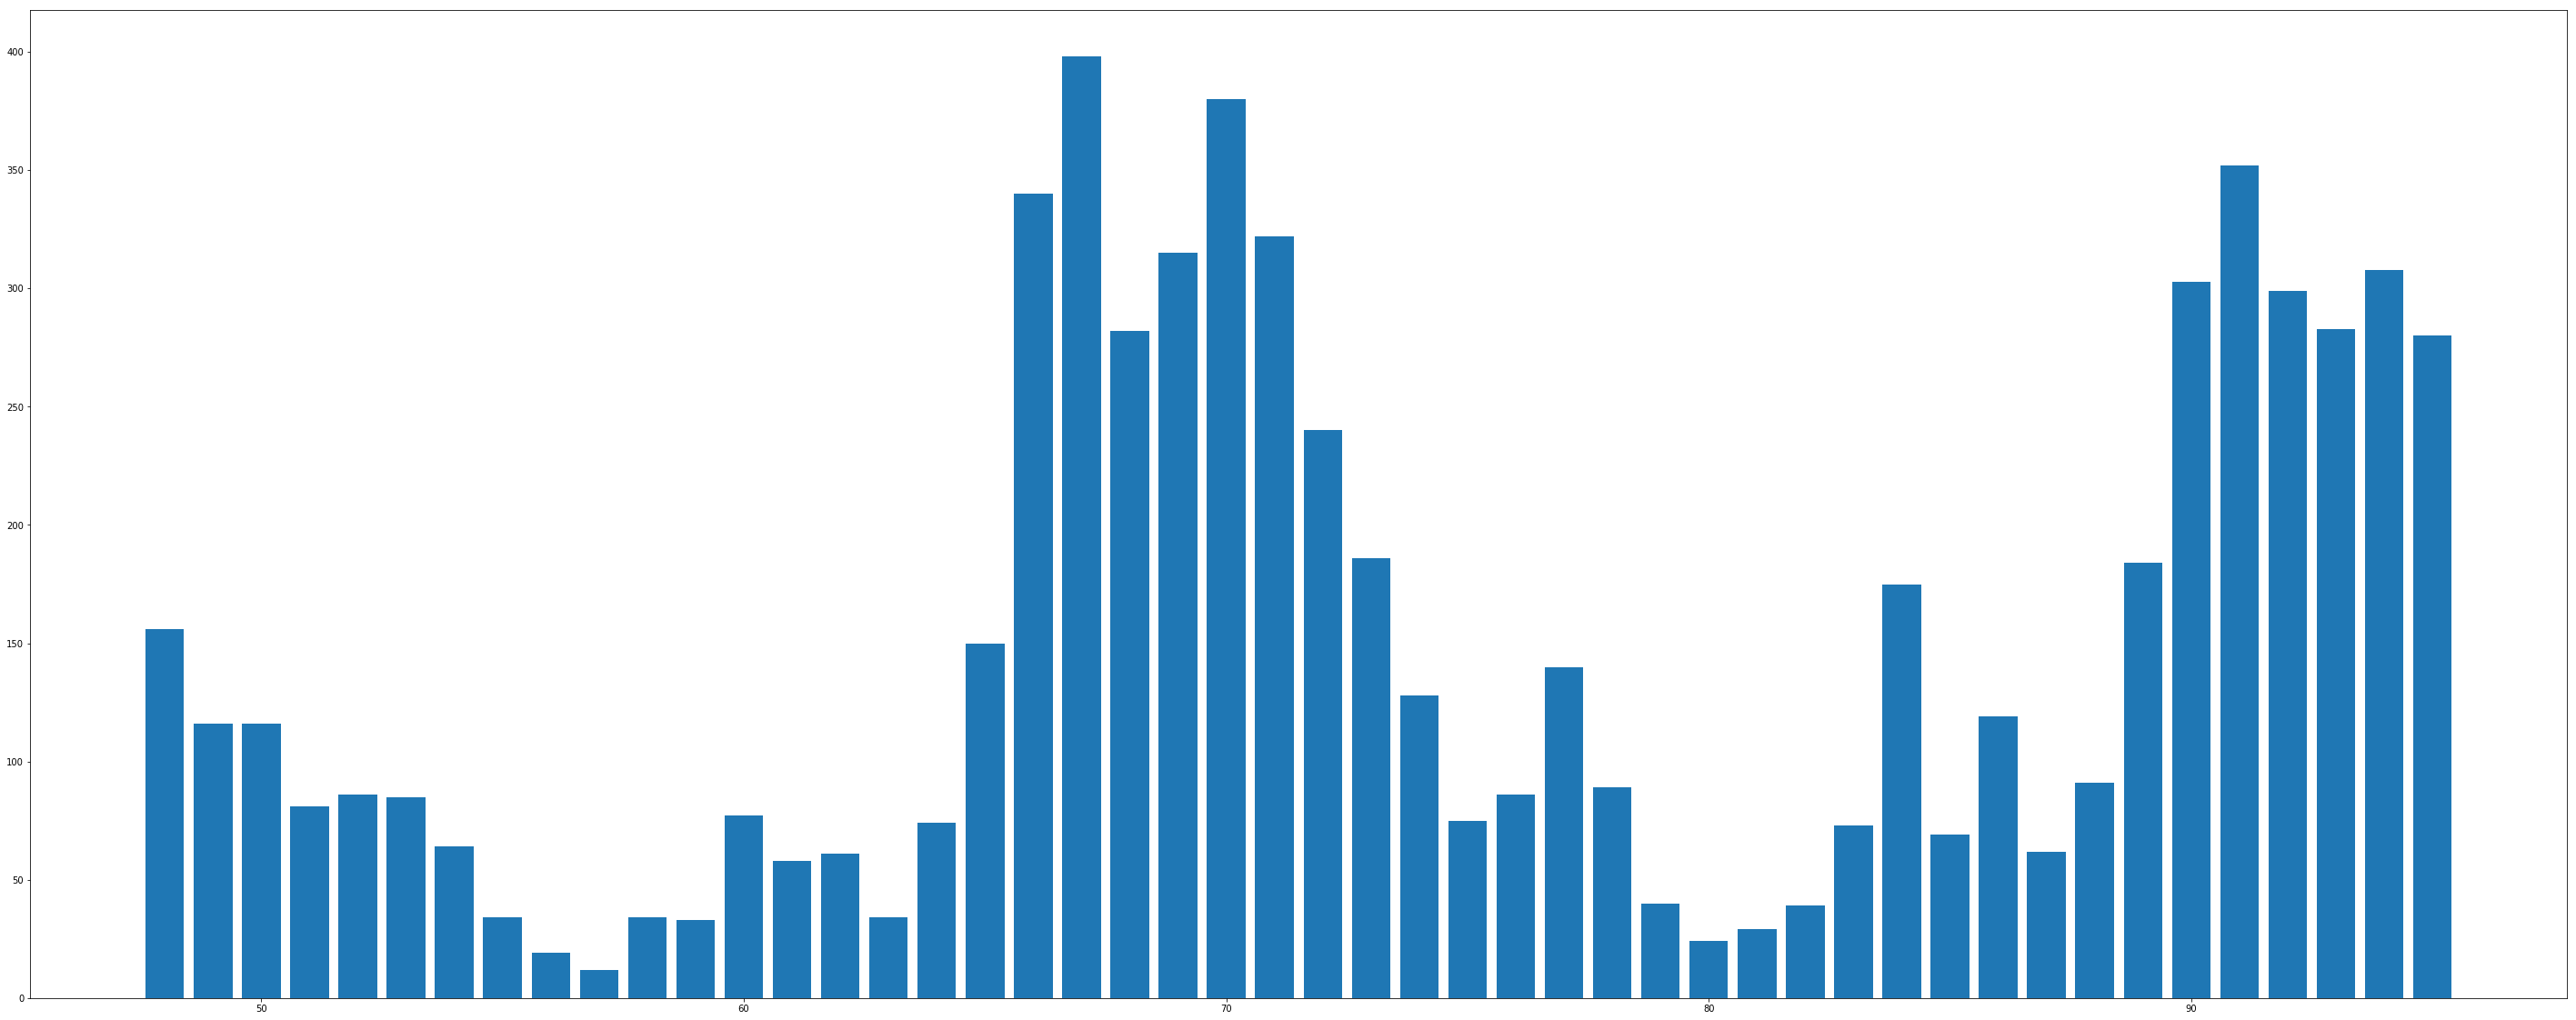

In [287]:


df_timeint_wednesday= df[ (df['Interval168']>47.0) & (df['Interval168']<=95.0) ]
df_timeint_wednesday= df_timeint_wednesday.groupby(['Interval168','Category'])['Category'].count()

plt.figure(figsize=(50, 20))
plt.bar(df_timeint_wednesday[:,'PROSTITUTION'].index,df_timeint_wednesday[:,'PROSTITUTION'])



In [288]:
df_timeint_wednesday

Interval168  Category     
48.0         ARSON              35
             ASSAULT          1232
             BAD CHECKS         26
             BRIBERY             3
             BURGLARY          483
                              ... 
95.0         TRESPASS           75
             VANDALISM         940
             VEHICLE THEFT    1139
             WARRANTS          639
             WEAPON LAWS       159
Name: Category, Length: 1753, dtype: int64

In [289]:
idx = pd.IndexSlice
print("PROSTITUTION on 168 hr interval: \n - Mean value : %.0f \n - Maximum value : %.0f \n - Minimum value: %.0f,\n - Standard deviation %.0f" 
      %(df_timeint168.loc[idx[:,'PROSTITUTION']].mean(),df_timeint168.loc[idx[:,'PROSTITUTION']].max(),df_timeint168.loc[idx[:,'PROSTITUTION']].min(),df_timeint168.loc[idx[:,'PROSTITUTION']].std() ))

PROSTITUTION on 168 hr interval: 
 - Mean value : 99 
 - Maximum value : 398 
 - Minimum value: 2,
 - Standard deviation 95


In [290]:
df_timeint168.loc[idx[:,'PROSTITUTION']].nlargest()

Interval168
67.0    398
70.0    380
91.0    352
66.0    340
46.0    328
Name: Category, dtype: int64

In [291]:
df_timeint168.loc[idx[:,'PROSTITUTION']].nsmallest()

Interval168
159.0    2
158.0    3
137.0    4
160.0    6
125.0    7
Name: Category, dtype: int64